In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
titanic = pd.read_csv('titanic_train.csv')

In [50]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


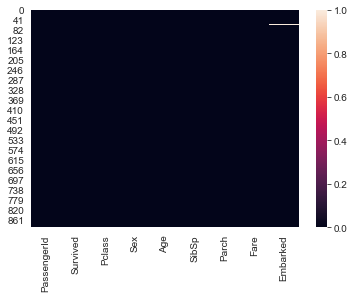

In [37]:
sns.heatmap(titanic.isnull())

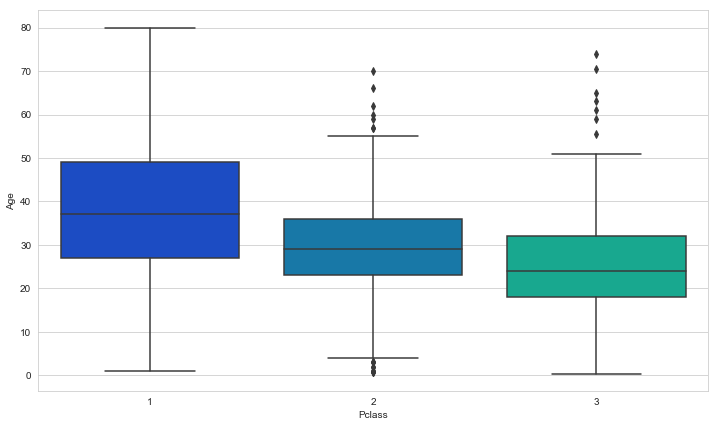

In [15]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')


In [16]:
def mapping(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 38
        
        elif Pclass == 2:
            return 29
        
        else:
            return 24
        
    else:
        return Age

In [33]:
titanic['Age']=titanic[['Age','Pclass']].apply(mapping,axis=1)

In [49]:
titanic.drop(['Embarked','Sex'],axis=1,inplace=True)


In [41]:
 Embarked = pd.get_dummies(titanic['Embarked'],drop_first=True)

In [44]:
Sex = pd.get_dummies(titanic['Sex'],drop_first=True)

In [58]:
pd.concat([titanic,Sex,Embarked],axis=1)
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [54]:
from sklearn.preprocessing import StandardScaler

In [55]:

scaler= StandardScaler()

In [68]:
scaler.fit(titanic.drop('Survived',axis=1))


C:\Users\SAM\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [69]:
scaled_features = scaler.transform(titanic.drop('Survived',axis=1))

C:\Users\SAM\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [85]:
ti_features = pd.DataFrame(scaled_features,columns=titanic.columns[:-1])
ti_features

,Pclass,Age,SibSp,Parch,Fare
0,0.827377,-0.535512,0.432793,-0.473674,-0.502445
1,-1.566107,0.671262,0.432793,-0.473674,0.786845
2,0.827377,-0.233818,-0.474545,-0.473674,-0.488854
3,-1.566107,0.444992,0.432793,-0.473674,0.420730
4,0.827377,0.444992,-0.474545,-0.473674,-0.486337
5,0.827377,-0.384665,-0.474545,-0.473674,-0.478116
6,-1.566107,1.878036,-0.474545,-0.473674,0.395814
7,0.827377,-2.043979,2.247470,0.767630,-0.224083
8,0.827377,-0.158395,-0.474545,2.008933,-0.424256
9,-0.369365,-1.138899,0.432793,-0.473674,-0.042956


In [83]:
titanic = titanic [['Pclass','Age','SibSp','Parch','Fare','Survived']]

In [84]:
titanic.head()

,Pclass,Age,SibSp,Parch,Fare,Survived
0,3,22.0,1,0,7.2500,0
1,1,38.0,1,0,71.2833,1
2,3,26.0,0,0,7.9250,1
3,1,35.0,1,0,53.1000,1
4,3,35.0,0,0,8.0500,0


In [86]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,titanic['Survived'],
                                                    test_size=0.30)

In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
knn = KNeighborsClassifier(n_neighbors=1)

In [91]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [92]:
pred = knn.predict(X_test)

In [93]:
from sklearn.metrics import classification_report,confusion_matrix

In [94]:
print(confusion_matrix(y_test,pred))

[[126  37]
 [ 56  49]]


In [95]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.69      0.77      0.73       163
           1       0.57      0.47      0.51       105

   micro avg       0.65      0.65      0.65       268
   macro avg       0.63      0.62      0.62       268
weighted avg       0.64      0.65      0.65       268



In [96]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

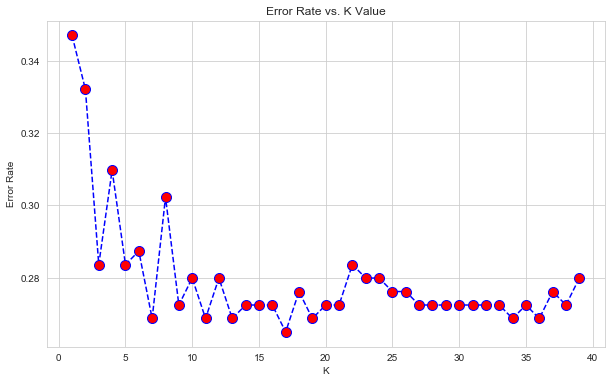

In [97]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [119]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=14)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=14')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=14


[[155   8]
 [ 65  40]]


              precision    recall  f1-score   support

           0       0.70      0.95      0.81       163
           1       0.83      0.38      0.52       105

   micro avg       0.73      0.73      0.73       268
   macro avg       0.77      0.67      0.67       268
weighted avg       0.76      0.73      0.70       268

